#Import

In [29]:
import os
import re
import pandas as pd

#경고 제거

In [30]:
#경고 제거
import warnings
warnings.filterwarnings(action='ignore')

Google Mount

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#파일이 들어있는 경로 설정

In [32]:
path = '/content/drive/MyDrive/yogiyo/data/'

#경로에 있는 모든 파일의 파일명 읽어오기
### 나중에 개수를 제한해서 추출할 것이기 때문에 랜덤하게 뽑을 생각으로 set 적용

In [33]:
filenames = os.listdir(path)
filenames = set(filenames)

#디렉토리 내의 모든 csv파일 읽어오기

In [34]:
df = None

for filename in filenames:
    temp = pd.read_csv(path + filename)
    if df is None:
        df = temp
        continue
    df = pd.concat([df, temp])

df.dropna(how='any', inplace=True)

df = df.reset_index()

df = df.drop(['Unnamed: 0', 'index'], axis=1)

df[['Total','Taste','Quantity','Delivery']].astype('int')    
df.Category = df.Category.astype('category')

df.to_csv('/content/drive/MyDrive/yogiyo/train_test_data/total_review.csv')

#Review에서 한글, 숫자, 공백을 제외한 모든 글자 삭제

In [35]:
for i in range(len(df)):
    df.Review[i] = re.sub('[^가-힣0-9 ]', '', df.Review[i])
    if len(df.Review[i]) < 12:
        df.Review[i] = None

df.dropna(inplace=True)

df = df.reset_index()

df.drop('index', axis=1, inplace=True)

df.to_csv(path+'sampledata_all.csv')

#각 점수별로 원하는 개수만큼만 추출

In [36]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0

max = 400

for i in range(len(df)):
    if df.Total[i] == 1:
        if count1 >= max:
            df.Total[i] = None
        count1 += 1
    elif df.Total[i] == 2:
        if count2 >= max:
            df.Total[i] = None
        count2 += 1
    elif df.Total[i] == 3:
        if count3 >= max:
            df.Total[i] = None
        count3 += 1
    elif df.Total[i] == 4:
        if count4 >= max:
            df.Total[i] = None
        count4 += 1
    elif df.Total[i] == 5:
        if count5 >= max:
            df.Total[i] = None
        count5 += 1

df.dropna(inplace=True)

df = df.reset_index()

df.drop('index', axis=1, inplace=True)

df.Total.value_counts()

df.to_csv('/content/drive/MyDrive/yogiyo/train_test_data/sampledata.csv')

df[['Review', 'Total']].to_csv('/content/drive/MyDrive/yogiyo/train_test_data/textdata.csv')

#리뷰의 길이 시각화

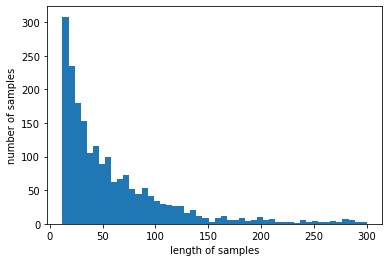

In [37]:
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/yogiyo/train_test_data/textdata.csv')

df.Review.apply(len).max()
df.Review.apply(len).min()
df.Review.apply(len).mean()

plt.hist([len(s) for s in df.Review], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()